In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as style

# 5 Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, log_loss

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.exceptions import ConvergenceWarning

import warnings
import sys
import os

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

# Load data

In [3]:
# No scaling
X_train = pd.read_pickle('./datasets/heart_disease/X_train.pkl')
y_train = pd.read_pickle('./datasets/heart_disease/y_train.pkl')
X_test = pd.read_pickle('./datasets/heart_disease/X_test.pkl')
y_test = pd.read_pickle('./datasets/heart_disease/y_test.pkl')

In [4]:
# Scaling
X_train_scaled = pd.read_pickle('./datasets/heart_disease/X_train_scaled.pkl')
y_train_scaled = pd.read_pickle('./datasets/heart_disease/y_train_scaled.pkl')
X_test_scaled = pd.read_pickle('./datasets/heart_disease/X_test_scaled.pkl')
y_test_scaled = pd.read_pickle('./datasets/heart_disease/y_test_scaled.pkl')

# Base Models

### No scaling

In [5]:
# Train models
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
boost = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
svc = svm.SVC(random_state=0).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)

# Print results
print('TRAIN')
print(f'DT: {dt.score(X_train, y_train):.3f}')
print(f'Boosting: {boost.score(X_train, y_train):.3f}')
print(f'SVC: {svc.score(X_train, y_train):.3f}')
print(f'KNN: {knn.score(X_train, y_train):.3f}')
print(f'MLP: {mlp.score(X_train, y_train):.3f}')
print()

print('TEST')
print(f'DT: {dt.score(X_test, y_test):.3f}')
print(f'Boosting: {boost.score(X_test, y_test):.3f}')
print(f'SVC: {svc.score(X_test, y_test):.3f}')
print(f'KNN: {knn.score(X_test, y_test):.3f}')
print(f'MLP: {mlp.score(X_test, y_test):.3f}')
print()

print('F1')
print(f'DT: {f1_score(y_test, dt.predict(X_test)):.3f}')
print(f'Boosting: {f1_score(y_test, boost.predict(X_test)):.3f}')
print(f'SVC: {f1_score(y_test, svc.predict(X_test)):.3f}')
print(f'KNN: {f1_score(y_test, knn.predict(X_test)):.3f}')
print(f'MLP: {f1_score(y_test, mlp.predict(X_test)):.3f}')

TRAIN
DT: 1.000
Boosting: 0.898
SVC: 0.719
KNN: 0.792
MLP: 0.846

TEST
DT: 0.791
Boosting: 0.835
SVC: 0.717
KNN: 0.696
MLP: 0.835

F1
DT: 0.832
Boosting: 0.864
SVC: 0.757
KNN: 0.746
MLP: 0.858


# Scaled Data

In [6]:
# Train models
dt = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train_scaled)
boost = AdaBoostClassifier(random_state=0).fit(X_train_scaled, y_train_scaled)
svc = svm.SVC(random_state=0).fit(X_train_scaled, y_train_scaled)
knn = KNeighborsClassifier().fit(X_train_scaled, y_train_scaled)
mlp = MLPClassifier(random_state=0).fit(X_train_scaled, y_train_scaled)

# Print results
print('TRAIN')
print(f'DT: {dt.score(X_train_scaled, y_train_scaled):.3f}')
print(f'Boosting: {boost.score(X_train_scaled, y_train_scaled):.3f}')
print(f'SVC: {svc.score(X_train_scaled, y_train_scaled):.3f}')
print(f'KNN: {knn.score(X_train_scaled, y_train_scaled):.3f}')
print(f'MLP: {mlp.score(X_train_scaled, y_train_scaled):.3f}')
print()

print('TEST')
print(f'DT: {dt.score(X_test_scaled, y_test_scaled):.3f}')
print(f'Boosting: {boost.score(X_test_scaled, y_test_scaled):.3f}')
print(f'SVC: {svc.score(X_test_scaled, y_test_scaled):.3f}')
print(f'KNN: {knn.score(X_test_scaled, y_test_scaled):.3f}')
print(f'MLP: {mlp.score(X_test_scaled, y_test_scaled):.3f}')
print()

print('F1')
print(f'DT: {f1_score(y_test_scaled, dt.predict(X_test_scaled)):.3f}')
print(f'Boosting: {f1_score(y_test_scaled, boost.predict(X_test_scaled)):.3f}')
print(f'SVC: {f1_score(y_test_scaled, svc.predict(X_test_scaled)):.3f}')
print(f'KNN: {f1_score(y_test_scaled, knn.predict(X_test_scaled)):.3f}')
print(f'MLP: {f1_score(y_test_scaled, mlp.predict(X_test_scaled)):.3f}')


TRAIN
DT: 1.000
Boosting: 0.898
SVC: 0.894
KNN: 0.885
MLP: 0.903

TEST
DT: 0.791
Boosting: 0.835
SVC: 0.843
KNN: 0.813
MLP: 0.874

F1
DT: 0.832
Boosting: 0.864
SVC: 0.873
KNN: 0.847
MLP: 0.897


# Best Models

In [7]:
# Train models
dt = DecisionTreeClassifier(criterion='gini',
                            splitter='random',
                            max_depth=7,
                            class_weight=None,
                            ccp_alpha=0,
                            random_state=0).fit(X_train, y_train)

boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='log_loss',
                                                            max_depth=7),
                           n_estimators=730,    
                           random_state=0).fit(X_train, y_train)

svc = svm.SVC(kernel='rbf',
              C=1,
              gamma='scale',
              class_weight=None,
              random_state=0).fit(X_train_scaled, y_train_scaled)

knn = KNeighborsClassifier(algorithm='ball_tree',
                           leaf_size=1,
                           n_neighbors=11,
                           p=1,
                           weights='distance').fit(X_train_scaled, y_train_scaled)

mlp = MLPClassifier(activation='relu',
                    solver='adam',
                    hidden_layer_sizes=40,
                    max_iter=200,
                    random_state=0).fit(X_train_scaled, y_train_scaled)

# Print results
print('TRAIN')
print(f'DT: {dt.score(X_train, y_train):.3f}')
print(f'Boosting: {boost.score(X_train, y_train):.3f}')
print(f'SVC: {svc.score(X_train_scaled, y_train_scaled):.3f}')
print(f'KNN: {knn.score(X_train_scaled, y_train_scaled):.3f}')
print(f'MLP: {mlp.score(X_train_scaled, y_train_scaled):.3f}')
print()

print('TEST')
print(f'DT: {dt.score(X_test, y_test):.3f}')
print(f'Boosting: {boost.score(X_test, y_test):.3f}')
print(f'SVC: {svc.score(X_test_scaled, y_test_scaled):.3f}')
print(f'KNN: {knn.score(X_test_scaled, y_test_scaled):.3f}')
print(f'MLP: {mlp.score(X_test_scaled, y_test_scaled):.3f}')
print()

print('F1')
print(f'DT: {f1_score(y_test, dt.predict(X_test)):.3f}')
print(f'Boosting: {f1_score(y_test, boost.predict(X_test)):.3f}')
print(f'SVC: {f1_score(y_test_scaled, svc.predict(X_test_scaled)):.3f}')
print(f'KNN: {f1_score(y_test_scaled, knn.predict(X_test_scaled)):.3f}')
print(f'MLP: {f1_score(y_test_scaled, mlp.predict(X_test_scaled)):.3f}')


TRAIN
DT: 0.926
Boosting: 1.000
SVC: 0.894
KNN: 1.000
MLP: 0.892

TEST
DT: 0.857
Boosting: 0.870
SVC: 0.843
KNN: 0.865
MLP: 0.874

F1
DT: 0.881
Boosting: 0.894
SVC: 0.873
KNN: 0.891
MLP: 0.897


# Learning Curves

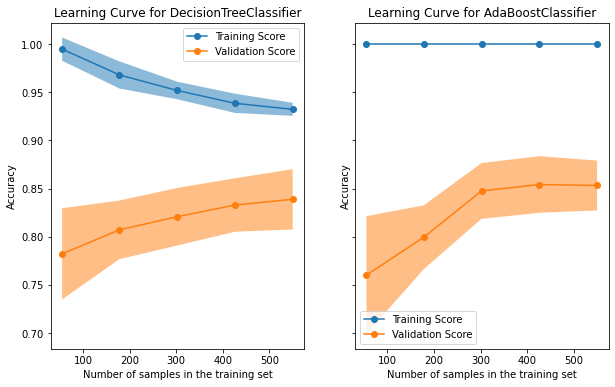

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([dt, boost]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Validation Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

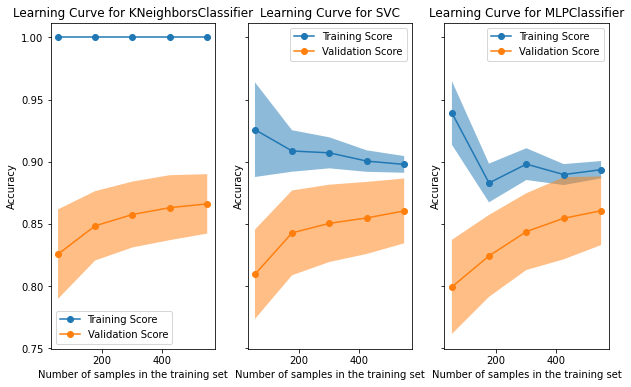

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train_scaled,
    "y": y_train_scaled,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([knn, svc, mlp]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Validation Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

# Scalability

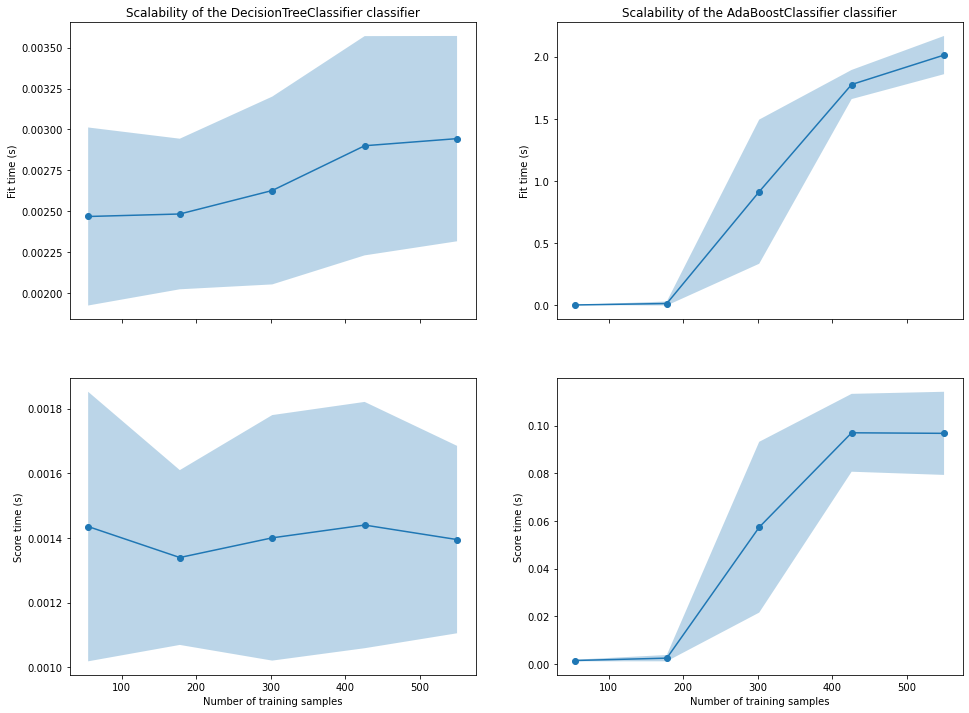

In [10]:
# Plot Decision Tree and Boosting
common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": -1,
    "return_times": True,
}

train_sizes, _, test_scores_dt, fit_times_dt, score_times_dt = learning_curve(dt, **common_params)

train_sizes, _, test_scores_boost, fit_times_boost, score_times_boost = learning_curve(boost, **common_params)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(zip([fit_times_dt, fit_times_boost],
                                                                 [score_times_dt, score_times_boost],
                                                                 [dt, boost],)):
    
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(train_sizes,fit_times.mean(axis=1) - fit_times.std(axis=1),
                               fit_times.mean(axis=1) + fit_times.std(axis=1),
                               alpha=0.3,)
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(f"Scalability of the {estimator.__class__.__name__} classifier")

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(train_sizes,
                               score_times.mean(axis=1) - score_times.std(axis=1),
                               score_times.mean(axis=1) + score_times.std(axis=1),
                               alpha=0.3,)
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")


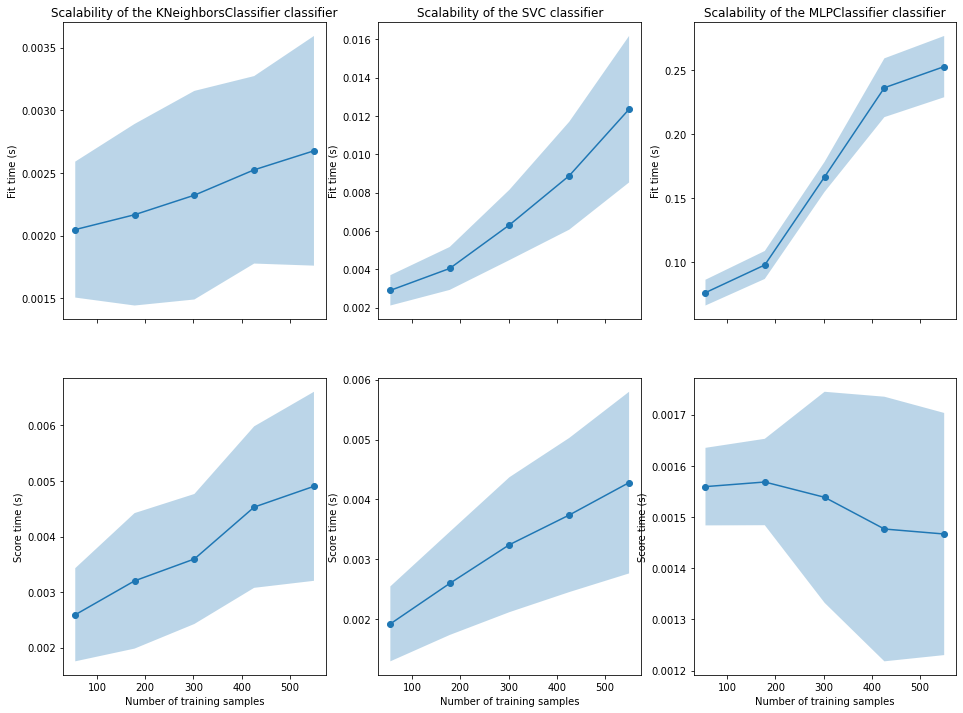

In [11]:
# Plot KNN, SVM, and MLP
common_params = {
    "X": X_train_scaled,
    "y": y_train_scaled,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": -1,
    "return_times": True,
}

train_sizes, _, test_scores_knn, fit_times_knn, score_times_knn = learning_curve(knn, **common_params)

train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(svc, **common_params)

train_sizes, _, test_scores_mlp, fit_times_mlp, score_times_mlp = learning_curve(mlp, **common_params)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(zip([fit_times_knn, fit_times_svm, fit_times_mlp],
                                                                 [score_times_knn, score_times_svm, score_times_mlp],
                                                                 [knn, svc, mlp],)):
    
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(train_sizes,fit_times.mean(axis=1) - fit_times.std(axis=1),
                               fit_times.mean(axis=1) + fit_times.std(axis=1),
                               alpha=0.3,)
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(f"Scalability of the {estimator.__class__.__name__} classifier")

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(train_sizes,
                               score_times.mean(axis=1) - score_times.std(axis=1),
                               score_times.mean(axis=1) + score_times.std(axis=1),
                               alpha=0.3,)
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")


# Plot Results at Each Stage

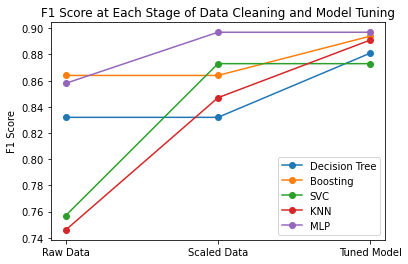

In [12]:
hd_results = {'Decision Tree': [0.832, 0.832, 0.881],
              'Boosting': [0.864, 0.864, 0.894],
              'SVC': [0.757, 0.873, 0.873],
              'KNN': [0.746, 0.847, 0.891],
              'MLP': [0.858, 0.897, 0.897]}

x_labels = ['Raw Data', 'Scaled Data', 'Tuned Model']

# Plot Scores
fig, ax = plt.subplots()
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score at Each Stage of Data Cleaning and Model Tuning')

for k, v in hd_results.items():
    ax.plot(x_labels, v, marker="o", label=k)

ax.legend()
plt.show()

# Confusion Matrix for Best vs. Worst Model 

### Best

Validation Accuracy: 0.892
Test Accuracy: 0.874
F1 Score: 0.897


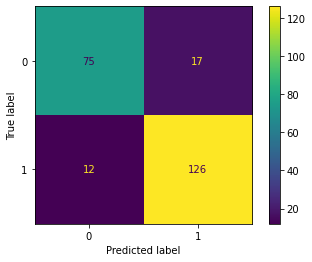

In [13]:
# Model
clf = MLPClassifier(activation='relu',
                    solver='adam',
                    hidden_layer_sizes=40,
                    max_iter=200,
                    random_state=0).fit(X_train_scaled, y_train_scaled)

y_pred = clf.predict(X_test_scaled)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train_scaled, y_train_scaled):.3f}')
print(f'Test Accuracy: {clf.score(X_test_scaled, y_test_scaled):.3f}')
print(f'F1 Score: {f1_score(y_test_scaled, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test_scaled, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

### Worst

Validation Accuracy: 0.875
Test Accuracy: 0.830
F1 Score: 0.863


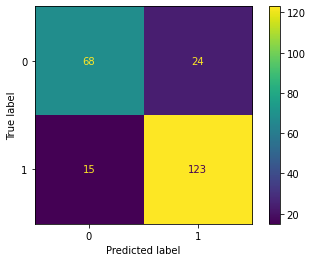

In [14]:
# Model
clf = svm.SVC(kernel='linear',
              C=1,
              gamma='scale',
              class_weight=None,
              random_state=0).fit(X_train_scaled, y_train_scaled)

y_pred = clf.predict(X_test_scaled)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train_scaled, y_train_scaled):.3f}')
print(f'Test Accuracy: {clf.score(X_test_scaled, y_test_scaled):.3f}')
print(f'F1 Score: {f1_score(y_test_scaled, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test_scaled, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()